In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(25)

standard_normal = np.random.normal(0, 1, 50)  
chi_squared = np.random.chisquare(3, 50)      
uniform = np.random.uniform(0, 1, 50)        
outlier_15 = np.random.normal(0, 1, 50)
outlier_15[0] = -15

df = pd.DataFrame({
    'Standard_Normal': standard_normal,
    'Chi_Squared_3df': chi_squared,
    'Uniform_0_1': uniform,
    'Outlier_15':outlier_15
})

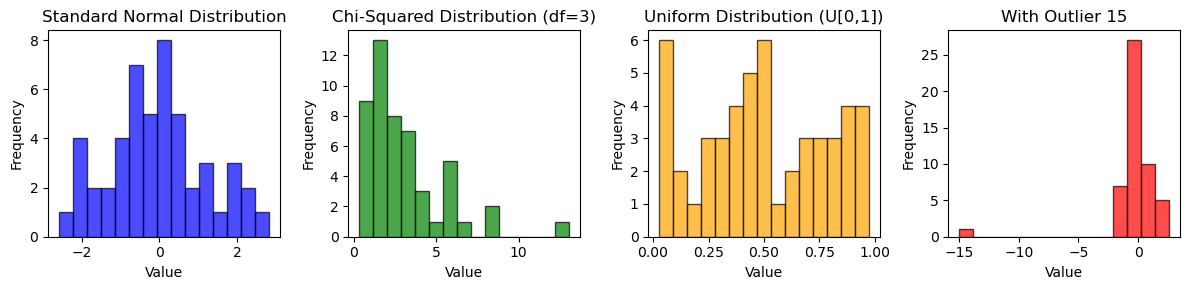

In [2]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 4, 1)
plt.hist(df['Standard_Normal'], bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.title('Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(df['Chi_Squared_3df'], bins=15, color='green', edgecolor='black', alpha=0.7)
plt.title('Chi-Squared Distribution (df=3)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.hist(df['Uniform_0_1'], bins=15, color='orange', edgecolor='black', alpha=0.7)
plt.title('Uniform Distribution (U[0,1])')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.hist(df['Outlier_15'], bins=15, color='red', edgecolor='black', alpha=0.7)
plt.title('With Outlier 15')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Standard Normal Distribution projects the typical bell-shaped curve centered around 0.
2. Chi-Squared Distribution exhibits a right-skewed shape.
3. Uniform Distribution exebits a flat histogram, indicating equal frequency (0,1).
4. Significant outlier at 15 which affecting the distribution's appearance.

In [3]:
from scipy.stats import skew, kurtosis

statistics = {
    'Sample': ['Standard_Normal', 'Chi_Squared_3df', 'Uniform_0_1', 'Outlier_15'],
    'Mean': [
        df['Standard_Normal'].mean(),
        df['Chi_Squared_3df'].mean(),
        df['Uniform_0_1'].mean(),
        df['Outlier_15'].mean()
    ],
    'Median': [
        df['Standard_Normal'].median(),
        df['Chi_Squared_3df'].median(),
        df['Uniform_0_1'].median(),
        df['Outlier_15'].median()
    ],
    'Skewness': [
        skew(df['Standard_Normal']),
        skew(df['Chi_Squared_3df']),
        skew(df['Uniform_0_1']),
        skew(df['Outlier_15'])
    ],
    'Kurtosis': [
        kurtosis(df['Standard_Normal']),
        kurtosis(df['Chi_Squared_3df']),
        kurtosis(df['Uniform_0_1']),
        kurtosis(df['Outlier_15'])
    ]
}

df_of_statistics = pd.DataFrame(statistics)

print(df_of_statistics)

            Sample      Mean    Median  Skewness   Kurtosis
0  Standard_Normal -0.052773 -0.072973  0.226037  -0.337186
1  Chi_Squared_3df  3.054281  2.421222  1.838250   4.294448
2      Uniform_0_1  0.500118  0.475349  0.003391  -1.074641
3       Outlier_15 -0.294329 -0.033337 -5.010564  29.727376


In [4]:
from scipy.stats import chi2

def BowmanShentonTest(x):
    n = len(x)  
    xbar = np.mean(x)  
    std = np.std(x, ddof=1) 
    v = (1/n) * sum((x - xbar)**3) / std**3
    k = (1/n) * sum((x - xbar)**4) / std**4 - 3
    BS = n * (v**2 / 6 + k**2 / 24)
    q = chi2.cdf(BS, 2)

    return BS, 1 - q

bowman_shenton_results = {}


for column in df.columns:
    BS_statistic, p_value = BowmanShentonTest(df[column])
    bowman_shenton_results[column] = {
        'Bowman-Shenton Statistic': BS_statistic,
        'P-Value': p_value
    }

bowman_shenton_df = pd.DataFrame(bowman_shenton_results).T  # .T transposes the DataFrame
bowman_shenton_df = bowman_shenton_df.round(4)
print(bowman_shenton_df)

                 Bowman-Shenton Statistic  P-Value
Standard_Normal                    0.8089   0.6673
Chi_Squared_3df                   59.9302   0.0000
Uniform_0_1                        2.7595   0.2516
Outlier_15                      1880.9588   0.0000


1. For higher p-value Standard Normal Distribution passes the normality test.
2. Chi Squared and Uniform are not normal distribution due to low p-value.
3. Standard Normal Dostribution with outlier will fail the normality test because the extreme outlier (-15) heavily skew the distribution.

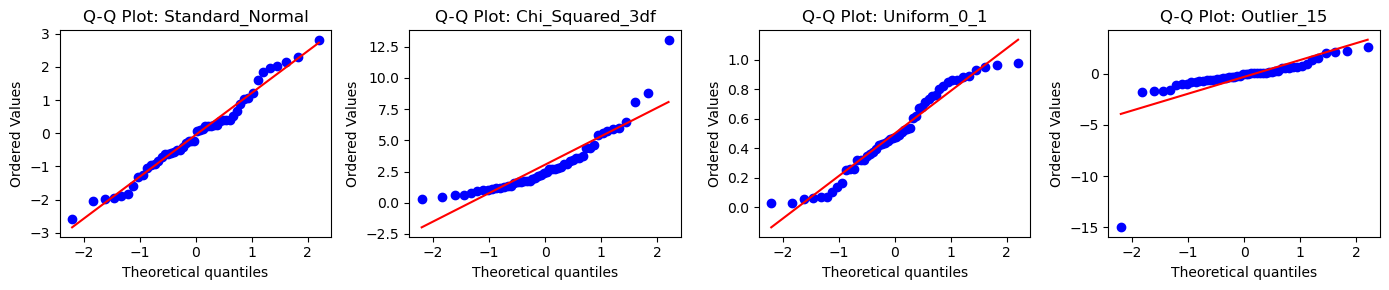

            Sample  Statistic  p-Value
0  Standard_Normal     0.9807   0.5820
1  Chi_Squared_3df     0.8333   0.0000
2      Uniform_0_1     0.9532   0.0464
3       Outlier_15     0.5001   0.0000


In [5]:
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt

def plot_rank_and_test(df):
    shapiro_results = {
        'Sample': [],
        'Statistic': [],
        'p-Value': []
    }
    
    # Plot rank (Q-Q) plots - Shapiro–Wilk test
    plt.figure(figsize=(14, 3))
    for i, column in enumerate(df.columns):
        # For Q-Q plot
        plt.subplot(1, 4, i+1)
        probplot(df[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot: {column}')
        
        # For Shapiro–Wilk test
        statistic, pvalue = shapiro(df[column])
        shapiro_results['Sample'].append(column)
        shapiro_results['Statistic'].append(statistic)
        shapiro_results['p-Value'].append(pvalue)
    
    plt.tight_layout()
    plt.show()
    
    # Shapiro–Wilk result as a DataFrame
    return pd.DataFrame(shapiro_results)

shapiro_results_df = plot_rank_and_test(df).round(4)
print(shapiro_results_df)

1. Standard Normal Dostribution is normal due to high p-value and aligned Q-Q plot.
2. Chi Squared and Uniform are not normal distribution due to low p-value and misaligned Q-Q plot.
3. Standard Normal Dostribution with outlier (-15) is not normal due to low p-value, distorted Q-Q plot.

The Standard Normal Distribution is confirmed to be normal across tests.